# EfficientNet Implementation   - EfficientNet- B5

## Training a Custom  Model from scratch

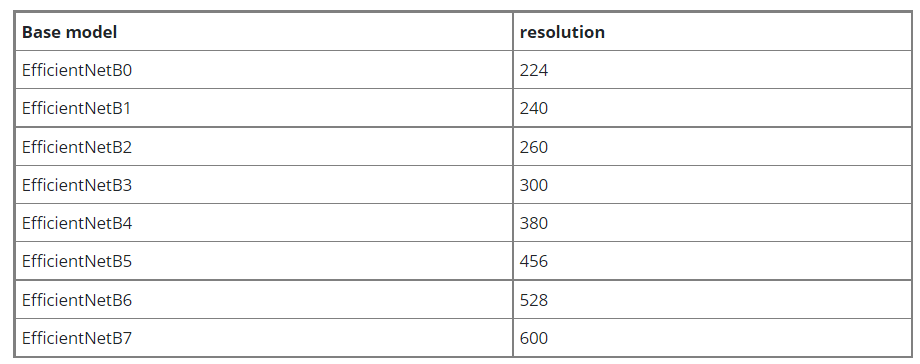

# Data Pre Processing

In [1]:
%pip install tensorflow

/usr/anaconda3/lib/python3.6/site-packages/secretstorage/__init__.py:10: UserWarning: jeepney.integrate.blocking is deprecated: please use jeepney.io.blocking instead.
  from jeepney.integrate.blocking import DBusConnection, connect_and_authenticate
/usr/anaconda3/lib/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography and will be removed in a future release.
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['benign', 'malware']
Types of classes labels found:  2


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

   Labels                                              image
0  benign  dataset_path/benign/00eea85752664955047caad7d6...
1  benign  dataset_path/benign/0a8deb24eef193e13c69119075...
2  benign  dataset_path/benign/0a464a3765ffc0c23cf47345bf...
3  benign  dataset_path/benign/0a2027ea20fd995fd41fbe1a6e...
4  benign  dataset_path/benign/0b65c9b63092c96fc737ef39a1...
       Labels                                              image
1977  malware  dataset_path/malware/4b747f699cdab219152094dd5...
1978  malware  dataset_path/malware/4b769d1f64649bcbc2b649ac3...
1979  malware  dataset_path/malware/4b802fc53050277a253c0eb05...
1980  malware  dataset_path/malware/4b3798e9ed8573fa44a441224...
1981  malware  dataset_path/malware/4b20937d2f09872bdb78359d0...


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1982
malware    1000
benign      982
Name: Labels, dtype: int64


In [5]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 456

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    print(data_path)
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        ul_data_path = data_path + '/' + f
        img = cv2.imread(ul_data_path)
        print(ul_data_path)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

dataset/benign
dataset/benign/00eea85752664955047caad7d6280bc7bf1ab91c61eb9a2542c26b747a12e963_L.png
dataset/benign/0a8deb24eef193e13c691190758c349776eab1cd65fba7b5dae77c7ee9fcc906_L.png
dataset/benign/0a464a3765ffc0c23cf47345bf1185426af8e6b5711e015ca18027afcac2f2e0_L.png
dataset/benign/0a2027ea20fd995fd41fbe1a6e6a361dbdc09a83741f1d9e928eddf50030c6b3_L.png
dataset/benign/0b65c9b63092c96fc737ef39a1f05e437d5bbe57f0ca2bc634a14a34a92ebcb4_L.png
dataset/benign/0b832ebbd0d324e28292d883ad532fd64a344c82360cf7fa052b4028559b4427_L.png
dataset/benign/0be00b72a65e558aa92a4f197663f3496b2a3ceaa5f77bafe309727141ad77af_L.png
dataset/benign/0bf9cfc88d56b52982655b56d577f69d2ee4b136908684015001c52c64f0a84b_L.png
dataset/benign/0c8af4bbf3e29c4ab7dd8372725a931985b669d15b82615ab05838ed348bf558_L.png
dataset/benign/0c9baed0badb2431a9b173609d3990ccbba7cba4455ba0e8ebe6267d8b4ae3ef_L.png
dataset/benign/0c1134c20c7f2a20eeda30f998c5e70336e56fa1fde05434028d97f3eeb31c33_L.png
dataset/benign/0d8d47b0b0bf9291e01f4267

dataset/benign/04c3fad7c843c2155a69e4a54fcc18324d1b4d366a0868550af02dfdd9186366_L.png
dataset/benign/04ffb8d60a17d6405a9408e73e9cabcdaf5e396f7c4784874dc49c353e97315b_L.png
dataset/benign/4a36f7ca6692cc55714e1c22ddae1a9ab19227db467c064922b9bdb78859ab02_L.png
dataset/benign/4a43f1eef4605f99278e609a8d372bc2386fb8f63ba6999e3ff5c3b80142a6f9_L.png
dataset/benign/4a495b476cc33e6be712a77184626725ec10e3f31b89d3c53010bd620bcd0cbb_L.png
dataset/benign/4ac565360c199789ecfe2405a2093a8060e6c2a3478409be627aa7cba6f48951_L.png
dataset/benign/4af3efae81865be6f458e37dfe10e31617f2151b51df89cb699aaf6ee06507d1_L.png
dataset/benign/4b4b883c0dc34f9d796e32532c3197090d09a4ac5094989a870e0370a8bd76d0_L.png
dataset/benign/4b86fc33172d0d3081164379dbbca8333f5f3eb6c75c7c82281332fdabb5ef8d_L.png
dataset/benign/4bbd4db544dc9fc6600c983bba42b07f3e9ada5501f2ec0d011c04c065f3eb41_L.png
dataset/benign/4c5a4bfbd6de5221c044b95c96fabc094fd854508471f9d7cb3890853ea318c3_L.png
dataset/benign/4c33d7c85ae6b19144edea55df4663fb476aaf1

dataset/benign/7fbdca56ddc65972ff22388b31d87a3fc2da0b0ca44cfbcab3467e54a6fbdc30_L.png
dataset/benign/7fd2d6334786adf1849a096e5709201f708cf981273fa2179b293871be4f3408_L.png
dataset/benign/08bf892562a748f1582b00283d8f15ec6f9a2f252c7ba95c2b55fbc60abfbd49_L.png
dataset/benign/8a003a2f25c4d464c9123cae4467afd4b50cc05287b370c53494c472bfbc8b48_L.png
dataset/benign/8aaf7e97960e9bc08487682382b2dc6b3b290b0d120855353b893e453cdc4326_L.png
dataset/benign/8ac39a906e4abe5d8c59f177c5ab92118f32fe0935c625a15a99df05998c381a_L.png
dataset/benign/8ae7d639819eec269bfa71ebb97af5aca69ea050b546d3330ed1f17965c2d3eb_L.png
dataset/benign/8b2bd52e65fa66c795b1b91b06a3c178d94351b5cd63a98ff6eea6f8b3405f26_L.png
dataset/benign/8b658db99f95a84d2dade78aeccec5be93b25392ffc80f78b457c3523827e7d2_L.png
dataset/benign/8b42292720589ce90e3d4b6d2eed1dab9f8f46827bf424975901902ccb6441ad_L.png
dataset/benign/8baaee3f0699d15a860e283880baebca72912df873c5b00fdf4d55c84ad06de7_L.png
dataset/benign/8bc53c486cba7fca5ffe4dd43976cbaac6bfb24

dataset/benign/42fd07c963c0e20be60de897497fb7783eb25f09480d9a03ea3d462182b08a74_L.png
dataset/benign/43b1d7cb1a978bd95a2c7e024401e960447883f6033e48bc4c1217dc9ba924cf_L.png
dataset/benign/44b6a440aa28893b3a9d20a9d3b729a3da38e27934db839b7b427331f814319d_L.png
dataset/benign/44c53c1111a6cd1c02567d9afa2465ba6eb3c01ed485663586af1d442f77d493_L.png
dataset/benign/44def887eaf39b6e4a76daa8c59ecb34baa30035825cf5737690d8fc8379ec94_L.png
dataset/benign/44f4cc87b43e3add1d1b9b75f1e4e3b5b0db549349c0f554ff28eaa0312c96ab_L.png
dataset/benign/45d82ff82b57f8403e6d0167f2e8c91f682f43dead77b74870a01a56a78a0652_L.png
dataset/benign/45de04fff6b76075a2bf0c2354e4d8951b390cbe72d0e5c53b162228d6489b9a_L.png
dataset/benign/46c629e4918166b75671f1fa6a6f467bd1948abbf0e9e4ea30f5d0e5fdfd84f4_L.png
dataset/benign/47ae084ef854a1c6664595f4369b15d386c95219f850584f2ae9e65b41c6441f_L.png
dataset/benign/47b3c091ff42a93e913d777f5db830f9ccc2d150ce610d4d7e74c8c0f7510167_L.png
dataset/benign/47f2e16177373b0f0fc9ea80f468030c39808d1

dataset/benign/88ec1f01619de1296a93e19cbdf9fd14564217fde42e396c65f278b5a0327a6d_L.png
dataset/benign/89f4d2249c33ef790f3ff03130161fddc3d4059bb7ae41e662014bd43f0f2106_L.png
dataset/benign/92fe8e8d5ebd4aab0c03651a8f0010078ac689eb32abdcef5902ad976e443757_L.png
dataset/benign/95a956b0e45c41a80fbc6b479226a9c6780da71e223ca1643cc2e060feea5977_L.png
dataset/benign/96b5ccf8044c42dce6772da871ab5f9f01ccab554e1a3b8832c6397c1bfe9e7d_L.png
dataset/benign/96e1776c94c1177014f4c46d151e179607a130b217dac3a03a38e5d257f5ccca_L.png
dataset/benign/97b3a8f65ae3a3b6d8702923f3be4167626d0fdd249895adcaccc68ad370b735_L.png
dataset/benign/98ba00e70a005017c3665741803e8b36938fc9efb0c4821c675f2c100936c5eb_L.png
dataset/benign/98bb99c8e2c267a06acd3f55a03a7bbd1770cb1c32a8cd31b44c6d66970cb219_L.png
dataset/benign/99ec947614ec6262aa85b4f132e39c618dc5a671165c50af1bdec1a5b3e127dc_L.png
dataset/benign/0111bddac92a792c7b2ee3ab77642c33df0e01afe737b0d1fa0cbbf331d9572c_L.png
dataset/benign/182b76c6236027029d3afd9482e5c0e4bb89116

dataset/benign/2959c295d8505b6e8bdbc2fc82d998ddf32d3613c1a50cc3dfb2f43b2f440717_L.png
dataset/benign/2999b0709f50ed5026039496142254af172990a50e2a6e1d327b7cb94b072f7c_L.png
dataset/benign/3088b3479bf282bffbb9929a6acc9f61fe993f7ad51cfb2917205d2dbfa1fbc9_L.png
dataset/benign/3422f2fbef0b4135b4e85c7bcfeaccc2a399ab2681080bc53733628af6b215b6_L.png
dataset/benign/3432b52dffcbb380c081d04554bb3d972d7809c7226713cc27ac04e9df27d362_L.png
dataset/benign/3686c09b2a7755811095196bd155757b5316883d27266ca2d808ba38b410163a_L.png
dataset/benign/3846f2ce94d43e9ef6c08cd0abfb5c6c6c993b00d8690bbea40cc525b44cc0a3_L.png
dataset/benign/4095c33ca52203420d14bf3402cdbae1f237a221c270fae8b302a0e06664ad6c_L.png
dataset/benign/4197fc76b3e00145191b260c9ae8e98531d966202669ad39d34137ce303d3566_L.png
dataset/benign/04631dabeccc7d887cc5317c6de48266272f1c90920d644c08895bc956ba3b3b_L.png
dataset/benign/04720bfdcf20864606b17eabea2b9ead471c1fbd71bf8ce8246edb7247b5d148_L.png
dataset/benign/4963a6954c4cedc517c349d72647fb30dca5f8e

dataset/benign/2312612e0004201cc5231565d3ed57c7c3bb84ec439b120370fb5e27e3602e49_L.png
dataset/benign/2338514a304a341b2ee7c1de696bf01e9179805da2c4edbdecf040adecfe8ab3_L.png
dataset/benign/2947757db8135ac19893707e98680aa279ec99eddbad267d8f20ffd9e4e2feec_L.png
dataset/benign/3006221cb8c23a1d3c9f059445a3c9df96fda1df7bae1b808b76dd453fc8db35_L.png
dataset/benign/3069656c32874d84e7cad06b4c0c39fb43393bfa8c57c1afe806eb9990f91c07_L.png
dataset/benign/3777466cacecedcab6f2e7adc82cfc5f18c0c7f41bea1c68192c4027d53c0d0e_L.png
dataset/benign/4859684e359b34a60f11ee19532df88abfc16b151581951d263f72e070e83ac4_L.png
dataset/benign/7320783c6e2941f13cbf3cdc75e649f6d8c1054175aa264693a404cec20f4590_L.png
dataset/benign/8677154abfcd9590574f243380dc8d62f40588a170fd5bd25711e09584443716_L.png
dataset/benign/9292535bb8c3fe6006e25781381caff773cfcf64a0ed1ebf58674d3dd8aceaf1_L.png
dataset/benign/23386407de894b70cb13e825420b7add88856cef0a2481883b79068cc4276369_L.png
dataset/benign/47345897afc335e518e03bc2b4afa016dd8cbe3

dataset/benign/afece3559e7425d5cfa1f015525cde6998b13129ae13a36282271d4341b11645_L.png
dataset/benign/b0eea66f156eec3be63fea4011f72515651ff6007b32f741008f22b0c01d892e_L.png
dataset/benign/b01bfe8ab2002184ecbdbd338b112ad400fa83c4519dc499902bb9d0ad389013_L.png
dataset/benign/b01ebabccdd9ba01a12d94191864a364100ea7978ddea792b99f614b7c267ceb_L.png
dataset/benign/b1a95a04cbdca12bd84cfe3f86e8ac11f33752171347ee1435fce13e5bff5195_L.png
dataset/benign/b1ad1afbe24fad21bbb633124c4d21f36871a0d3cba498cfcc049eb3a358449e_L.png
dataset/benign/b02c253a85455b8eed9550325ba6b8a55b745281a7d1dbec58eb49e7d126b4cb_L.png
dataset/benign/b2a4ad4798937c89922dba29ceef46b62e6d220ceb847502402aa1da4ba0593f_L.png
dataset/benign/b2ded3ce4b19a18844d4aa90b60dfc1a8d3e9cd7649e7478c524d5c9d035fccc_L.png
dataset/benign/b4be4ca9053d83301bdd01e6e2568af791aa819798f29fc8cf85eab4037edb4e_L.png
dataset/benign/b4e7447b3732199920a940f3a7c0768ab7040d68290e45c4178d2e0e4365c972_L.png
dataset/benign/b5d8a878947d4572f77e237450a07671856b809

dataset/benign/c2563bb38ff3a2f9109febfc012afa329401a15aea4a1ac72659a11be9150b4a_L.png
dataset/benign/c3592db1a64fdc0bbaea76fe15754f5a44a9fe53575572fb46744224a5cfd444_L.png
dataset/benign/c4617cd94408d13e68d3dd75920911a56a1b1bae0fb19c035b156ec4a3cdefd5_L.png
dataset/benign/c7269592ece77706917a1242e19690f7a9f92f213f4a00540827591e4b2e3abb_L.png
dataset/benign/c8815316c65e6449e742a792a415a5e59dd42d62a3ede7a980a20a9c72db89a2_L.png
dataset/benign/c7739012562be8188e394bbefcaaf04358f48a8043511c72d4baba664241fead_L.png
dataset/benign/c166496095542a51d8dfc8cbeb83c85db71a683695e0dd7e6341f32cdceb20c6_L.png
dataset/benign/c0975115208399a8e9fbec2d9dee70af458b44471c8d8ac1b09c21631f9dbc4a_L.png
dataset/benign/ca91ab3a6c6a58e2d8042be6d5a8df9b4f7e794f24fc89d6f75b7c04ad7cc7f7_L.png
dataset/benign/ca176b32589ae38d689f8730856cf10f4bd63cda04bdc17a700d02d32c2aa3e9_L.png
dataset/benign/ca6710ac624c4badd89606d2d46270b68a494b9778a109477955f6403d77493e_L.png
dataset/benign/cab5577a83571f7bc46dd0bea6a12f7e872f811

dataset/benign/e47adb18253dbdf07276faef715d56fc3840b20ea2c2e6ec5690811afb7daed1_L.png
dataset/benign/e68d0aff6f9b17d0c48a18f79e0f405f420242ac9c0c4579c8cced7ef699aa46_L.png
dataset/benign/e82b3e2d357ecdebc189379f79f2b354d34c7af1a1d56de51ad5a539059dcf61_L.png
dataset/benign/e87bde4257e33f4f185dc872e0d7fc0a378741233ea3dd6a2665bfcf44bad1d4_L.png
dataset/benign/e97fde1aa1260261577d81203a2a0b1b666e7774b44f42be89c84065d93e89e6_L.png
dataset/benign/e99c64aa27d56613a387cb94d1d4ee6777e2d1d1da59c6991037fe0b2615cd02_L.png
dataset/benign/e417a2a7e4a77e96f819ef1fca0156ae01807825c0ee0817e649fe6c0d41a4be_L.png
dataset/benign/e614bb23131efe77b8ef6cfe08a28ceec7a9adccc03d183b7a287ac6c822de1f_L.png
dataset/benign/e690cbd19b9ca80398251b709544428ad56b83866c940c13a50af30162e25ac9_L.png
dataset/benign/e693bc556d4e07471933b03456a509b068065698f86c34875d08bb0b4819597d_L.png
dataset/benign/e904e2854dc69d740d03101764ff1dcad82acd70b5b9b6076f26d0d64a68f1ce_L.png
dataset/benign/e929cae582e4f92f60ec607da7acb448e227426

dataset/benign/ffb860e143e71b639ce6e78afc0a4e120714fcffbbc8113932daa612e387f630_L.png
dataset/benign/fffadeda975e01bb25fddcc63670cb1b73082db4addc58e782f0b4aa2af976e4_L.png
dataset/malware
dataset/malware/000d1bab5fa789f2d3b120bccb5452c7c3fe52073bd88d7d651b27dc68eb5423_L.png
dataset/malware/000d6230792fefff601c0e5e87369196fdd5cfb484fdd87916a080d8b9ffc1c6_L.png
dataset/malware/000e731440308f57fde3cf58626ec77edd4f3f89a9d9e964ea170d18fdef9069_L.png
dataset/malware/00a0d8c3adc67e930fd89331e4e41cfe2a7128072d5d3ca0ec369da5b7847a45_L.png
dataset/malware/00ab1c6b7654dcb244dac269d0012e5badabff7eb8c40b428009d6ee86791591_L.png
dataset/malware/00c5240f41d311ed58e92f805d915359e1d202e9ef9cf7f567519907868947c8_L.png
dataset/malware/00cc9bb91df017673ce091d87aca25aebd1119c19a1feef73dca9194a4a9248d_L.png
dataset/malware/00d947043b5ee7d6e789a0a81286e50371c6417e0601f7ad62f9018c5c14eb74_L.png
dataset/malware/00dbedfa52c46cad28416fe72a908c2ae33b77eb8c317cd05a29865d5ab34f0f_L.png
dataset/malware/00e0f78782ab0

dataset/malware/0c839f901dc853454efd77f4a3b664c5526cc260f0911a58493b939768d1f5ce_L.png
dataset/malware/0c1819af3507d4ebce09972b41574e897b7f4d5dcca62c509ed08bfd14eccb9d_L.png
dataset/malware/0c4636f218939c13cfd1fd4651804efc7af62b8fab02d6bb902206b4c8c01cf8_L.png
dataset/malware/0c6923a2377cd2eb6ad361ce07b8c0c9ccf743c82bb67e79065a1d2ac658aa7a_L.png
dataset/malware/0c721326ca95022900e1c18fda6cdb4db532ae9c804228985c6df980b3be7ea1_L.png
dataset/malware/0ca892a65beee945dc60ffd229ee4a49f15ba4001707a925739b445c0fa65e81_L.png
dataset/malware/0ca3818d5f1269490baad747ac5ca3926390ca6b595d6625acef8df63e80defb_L.png
dataset/malware/0ca8738e31c4b149f1bcd837b4c35c086c2765db2845e9767ec727eabf1a33de_L.png
dataset/malware/0caab068b9fdc098cd3d482d7dd002024d918a226e776eeb2fd3731a2f3a2cec_L.png
dataset/malware/0caf8a5c14107b91d13b9f87a5901ad7d3bf562ca7062319c25da0eb637ea474_L.png
dataset/malware/0cb17078bb20234b689836ff48c147ebcdf4abc3fe82e42ba51454fe1cb4a1e5_L.png
dataset/malware/0cbcb57fca988f97bd3471fa9fe

dataset/malware/0ec199cc9ff60932007e9fbad91ad88a8e517e7cc224bab89055a0651f46adb0_L.png
dataset/malware/0eccf6efc811048091423c64c7ed8726d3ae9d269a31f5ab013360adc54b6fc4_L.png
dataset/malware/0ecf8a4d326cb84bbfe6d15e603973754180ea12c51e768273dc7f6de34a197b_L.png
dataset/malware/0ed72a28ba5bac7f44f9e4519db5f8c8d94076d85a929c2004da1cba99559610_L.png
dataset/malware/0eddc7ab734587c32dbc9cbd68f2a2efd6acade721bad6f641378c56351ed80d_L.png
dataset/malware/0edef898c9cb41d3dd8ee72b38c7832a1e2da3f6f1b3cda882ead2fc0727f850_L.png
dataset/malware/0ee6d51a795c7a1b04d7b09ea02a0c0f062d6996a9f932f8509b777b24c574a1_L.png
dataset/malware/0ee7de58292cee9e9660922d5ae1f5aff9a476bd74be17897931947d8065b167_L.png
dataset/malware/0ef0f2a9f3a05d4275103e39dfbb3a9f20a10dc07ea5112fcdce580e3a0bcfd7_L.png
dataset/malware/0ef1742bf0ac0c3847d72cbcf6d8ed8955d13173225edf0e1432c923e65f2f97_L.png
dataset/malware/0f0a34192c8bf3acdc8b356b4977c2a268528e7c75e58157c9709ec86ba44f51_L.png
dataset/malware/0f1efa66309218d3ad0e3965034

dataset/malware/1abc66ce93ac570be5604e4ea856013f9b30693adabf893e4337bc55744f062d_L.png
dataset/malware/1abde801ae96c20677067752a010923dd4dbc91267bb73df06835ddb93ec76ff_L.png
dataset/malware/1ac584fb9c6d05e5f204eaff06a22f15b773ce81a3d517a9d4f165311c1b9615_L.png
dataset/malware/1ad0e3f2fee448eb3efa7b0b4408b28b66418c373f30ffece5a58a734edfe5c5_L.png
dataset/malware/1ad26d8e32e2566e5e34cc13058c9fe21adde97474da05d1b1b2ead8abf4ef1b_L.png
dataset/malware/1adcac9cedbdb55d81789566b5f2dabf71c99b5d1270558d605379a0fda945ed_L.png
dataset/malware/1aee80e24c4ffc1400a7c8c2e81be18bc777206f51d6014969e48053148ee1df_L.png
dataset/malware/1af2c79ce15b298a365be02c0cd9b973ebb8e09030ee80f81fd872c3d44ad787_L.png
dataset/malware/1af7ce2320a6baaa151f948fda0b9f6e1994168685c3ce648487764798d35bc3_L.png
dataset/malware/1af65e47992b406fb9167221301abe0aa8d65528abbc10380f1059b0a1487111_L.png
dataset/malware/1af210cb0aa9e171e1287d827cb32f9b5806435264b0c28dba231c8324929212_L.png
dataset/malware/1af2687720617c563f1dd97d52d

dataset/malware/1d94c9dc4102a5fd0a7efa7726aceecfcb4917ffd863ca6c379a3a6ad30bb291_L.png
dataset/malware/1d122d73bbc11e04b09136d3795645111e93424e4b5de3f7d87e3458fed06481_L.png
dataset/malware/1d380a8bd11af52fd85e5db070b359ddf59ed6a59b1156658f2eabc3dca083a8_L.png
dataset/malware/1d498ff0434b9c382c6b6729584b6f2d016ba7cdd9e8f5a59330983814bfc809_L.png
dataset/malware/1d773d866966940f042d442b9e0cec638e733a83f7137cbdd4e70d4cb9803ada_L.png
dataset/malware/1d859f178058675075dc2bf7b7ffe7c4bd6a095cf2da986f904c064bd8066dcf_L.png
dataset/malware/1d940e064cb743cd9e18abfcc4f92d45d03dff7d8728d74988d8cf00a552d91b_L.png
dataset/malware/1d26709f5afc640e1825ad27d6e49960b828c4224df3e5583575a1364c16ed3d_L.png
dataset/malware/1d145429c44cd38f413b7de40880bc75bb4b48a87f77638a0fc8c519cc399a55_L.png
dataset/malware/1d8337931c529274f7a3880e64ef041ae0aa8cb725f54a55efd32372cddf5218_L.png
dataset/malware/1d9027473fe8493eb6724c8cdf15cec4d1b161b276eb893fc12052a62ff54cc4_L.png
dataset/malware/1da4dccfb402bcfbc196d4989b4

dataset/malware/02ccb04d1f6ab5c6fdb81d00fffcf2ad6abfb45b114e308f7944a1a00619820e_L.png
dataset/malware/02cfabd2e684c8acc3694af40167b6b72001b8afdf1cae970094c64eadd70a07_L.png
dataset/malware/02d6ce57d0a26f24518763187e7f21dbf855a8d8a389b3b93e01e85f12e88502_L.png
dataset/malware/02dce9c797720514c556ccdd7ab1ea25eab5c21512f9f7e0da4c74d3c8e7aff7_L.png
dataset/malware/02e4f6da42813c531c55fe1aa43628e0c4dbb231959f6de8c2ca8454bd674644_L.png
dataset/malware/02edbdacb4bbf629d577ebdbddeb517af57790f2dc06dca4e412be4760381af9_L.png
dataset/malware/02f8593b80e8080e1cf73b522003e9ffa7f6b334e399b73db4a1115381f1851a_L.png
dataset/malware/02faf705803294e6e12dc58b23a1cc7481eb160ada8c212f5ac45fdc740f0855_L.png
dataset/malware/02fbc59091a54f1f39890d4372d8784cbc8f8df5a5052123e34113e2d74aa1c1_L.png
dataset/malware/02fe6cfd1d8c2e88fb8183413d2f14590464e283e2e51c7fef5df672adca7664_L.png
dataset/malware/2a1e827b1f91ee76723d47ed221b5cd8ee8ecaded17097a4701c82f0552d4bd0_L.png
dataset/malware/2a2f5efa19f320cd3f0b11614ab

dataset/malware/2c5c6577408a84804e5cbd02cfc25a38fbecf3f8ba87a66ed93dd0af9f6f5edd_L.png
dataset/malware/2c5fd946325ec89b02cdbcb3c7063aa3cc5e8c8a3259c34d0a7effc050057616_L.png
dataset/malware/2c6bb2956b08cb745a5a195deff6fe4761415ebd5ea0c46c1c14b36f725ab10f_L.png
dataset/malware/2c9e08609e3e8ac82478e0b64055f97df479a23aebfcddea1bf8cb725fb00469_L.png
dataset/malware/2c19a5f8e24e277a18f2b8da797fafa0a8b81624b2c7db3509b1f0463a2f4765_L.png
dataset/malware/2c37d78609450c02d998c9e27ad6bc594ae4bf5ae9f789011f6557aa0c50d05e_L.png
dataset/malware/2c055f888f92351290dbe19a83a6f60bbdee63822ad97eed8693b1ee79735477_L.png
dataset/malware/2c97f34f9f2c5043a2fb9940566f16e717b5596dfbe2e3266e47022fef356259_L.png
dataset/malware/2c127f91b268a5e6316f343781451b76bee664638987ff6d17622be8def3f864_L.png
dataset/malware/2c700ebcb9952dc5e95f5f2232cf62ec5c204e9914f1bfddeb7a1d21cc2f44d8_L.png
dataset/malware/2c1359ce63f7b747ddfc79e869ade59cee4a5d24cd224ac41d0de51f114d6c0d_L.png
dataset/malware/2c1487a61bbcd807564589279cd

dataset/malware/2f0c530e0a7a99504542e562e3dd08d893acf73835b104d85ff154cb18a97b31_L.png
dataset/malware/2f3a07ab3b9452ad0331036e37ea346534a87f04d33811d68c3c888f923f43a3_L.png
dataset/malware/2f5f6f296f85728cd128a1fe080cdcdc3631aed0b6a112f9fa0ec4dd3a99b676_L.png
dataset/malware/2f6a389de60e0d8cbadb9fb6be9bf84b3d78a14022411b5b13660351c9cfa2be_L.png
dataset/malware/2f6f7823f60de608c48a7bfb02459a54655ffc7ccef2ce7d96fd170bbc768cfe_L.png
dataset/malware/2f16ca228660b81550f5a77a3c39578d56509bd6f00ed47b190b81dc5905c26c_L.png
dataset/malware/2f18dc7186cd7566c21c7fb614b418561be94d5fe3e2381bccac0fa291d13bd4_L.png
dataset/malware/2f029dd068082410bf88ec40760f4cba048c8c8bf13e9fbb42260688858dd426_L.png
dataset/malware/2f32aac6a779907f9eed4dc17ade072f5123fce48eeb247d05e1e2e2218bec63_L.png
dataset/malware/2f35cccc6678e63ef4e56bd33955e019d304ac1155961bb9f68e6d16fcd35be1_L.png
dataset/malware/2f60d780a632d9a2908b2bd288f1640fa3b61b9068b21e5aff4e432de4844e6e_L.png
dataset/malware/2f61de44c911f8f2feba820036b

dataset/malware/3b0313d2013ac8bdd6fd4ac9e1491db4f8cff2e8b3f7ebbf60111b7861923d95_L.png
dataset/malware/3b655dcb7a2428cb0e6f063018c4512ee2bed264ce8a16bff8b1deb5c77b1f3e_L.png
dataset/malware/3b679dfeac3a1585e04ae6d1c63dd55356f624dd15a964f8a8c56e33d5324505_L.png
dataset/malware/3b819bd40698d091a166f1e9f7ef8ea9f1d73cc8c2d68aef8e443ac8a5c66021_L.png
dataset/malware/3b2951aef7608ac182547de8f299d699994c3efe71af80502d930ac46a4eb867_L.png
dataset/malware/3b3509f63c9c5930a03f8c28772ec311e09d22c5d487a3533fe58be8341f8d5d_L.png
dataset/malware/3b08135af5c2ddaad662ed4f1f02f77eff2bf0fe9f33cfadf5ff783fd2acb775_L.png
dataset/malware/3b45172a15ba8cc7b28494d22db10765e628c48e3150b14c0b39466c70c26ee3_L.png
dataset/malware/3b052379f16c15236f6e09347dc9a97128ada57c3aff6f2aca80ea2773216c71_L.png
dataset/malware/3baaca1e5b6615d146bb01859515984ec9e5a35a1f4a86c995cb990fc48acb01_L.png
dataset/malware/3bab265b48e6bb91db54d1eb457851df217e3ecc2c7c913c29d560db2b491c72_L.png
dataset/malware/3bac36f5fa513dd5920caf37ec6

dataset/malware/3df88f19afcf3fbb2112f5079faacab10302a5f3bf7ead1b23ac7fdaf1ae1206_L.png
dataset/malware/3dfab659da62061c32e7de935210228fc19ae8fe1d3403628531c478e3f601ac_L.png
dataset/malware/3e0c53e75c6aed461d759b7741aba15b51ac072587cb0223f8d684121cea0d5b_L.png
dataset/malware/3e0f1bc16bf3d96a1cb435e343787ffaa4fbb8ae871e9651788049dad1b50c04_L.png
dataset/malware/3e01dce0f3ab0d6a36aa4f8c5cf0c331f755379bdbaa8de132b313de952b570d_L.png
dataset/malware/3e01dd1675ad55ad5e30f19ce5de03ded427de6c57b797ba0213efd2f0463d07_L.png
dataset/malware/3e1b87849645a7f5b3075f28bff9176db3270abbf996b9f1f0a8e55aace2563a_L.png
dataset/malware/3e1d8230bb0954f63e6b2fb4105070b1ecff2828ea2cbf24a76a686c94dd1026_L.png
dataset/malware/3e2ca870d838e00266a62b3511325f6d7e989510a3d1065fa2d6e038f354ba4c_L.png
dataset/malware/3e3c69e5c87c327b9869819fa399c48cd7b1bb0d88969fba30bf32a94936b387_L.png
dataset/malware/3e4ab934aaa831fc34eafdc612260b3856b77415d3476b311e3a08dafd180afa_L.png
dataset/malware/3e4b2fc678accf44d51b50206b3

dataset/malware/4a3fb4dc2554cdf68cc4a6919153903b1fb8c76491facac7cdac2ae47344a064_L.png
dataset/malware/4a7d14e4801b2d0b6aec6b93664693c49b1cd68d32d1c82684632034c6a93d1e_L.png
dataset/malware/4a7fcf9a74e8a92a0b95e0182b839d29d5cad9fa295621e4d8f19403080c8c8f_L.png
dataset/malware/4a8e1f194d8e0d7f3379d0fcc528ec14a7ad9b202ac9c27da2bd1b30b0085ba7_L.png
dataset/malware/4a9a7098711140b4b1a0cf9fe46d62c19699826760781761346e735710427951_L.png
dataset/malware/4a9e7e209193da1dfcbdc04d939f9ac3238e16d92e74e19fbad7d08b8d8f64f1_L.png
dataset/malware/4a75f417605090f6813b889d18cb9ea47b57d8cee800ef39a59097e9e5ee90d5_L.png
dataset/malware/4a275a83c6ce199cc0f01dcf1fa555735668d909bf9738243b0027686d8bc64c_L.png
dataset/malware/4a476cc2d11ea445fe08edfe487a4dd009394265d8713443248cc773cd47ba7b_L.png
dataset/malware/4a997ea2a3a3c779ede4eba52b92b6a01f6512c4fe425ed712bc44e8d1b7cd94_L.png
dataset/malware/4a782926cf7e1980669556bd9673694a5649d2495eb46f9a31bc27b373662eab_L.png
dataset/malware/4a28006497cafe16f5bc12f1e81

In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1982, 456, 456, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['benign' 'benign' 'benign' ... 'malware' 'malware' 'malware']
[0 0 0 ... 1 1 1]


In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.3, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(1387, 456, 456, 3)
(1387, 2)
(595, 456, 456, 3)
(595, 2)



# EfficientNet Implementation :



In [10]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB5

NUM_CLASSES = 2
IMG_SIZE = 456
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB5(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=10, verbose=2)

model.save("B5_model.h5")


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 456, 456, 3)]     0         
_________________________________________________________________
efficientnetb5 (Functional)  (None, 2)                 28517625  
Total params: 28,517,625
Trainable params: 28,344,882
Non-trainable params: 172,743
_________________________________________________________________
Epoch 1/10
44/44 - 2852s - loss: 2.3412 - accuracy: 0.6431
Epoch 2/10
44/44 - 2825s - loss: 0.7839 - accuracy: 0.8594
Epoch 3/10
44/44 - 2768s - loss: 0.4682 - accuracy: 0.8919
Epoch 4/10
44/44 - 2770s - loss: 0.4190 - accuracy: 0.8919
Epoch 5/10
44/44 - 2808s - loss: 0.3555 - accuracy: 0.9084
Epoch 6/10
44/44 - 2833s - loss: 0.4058 - accuracy: 0.9056
Epoch 7/10
44/44 - 2780s - loss: 0.2343 - accuracy: 0.9149
Epoch 8/10
44/44 - 2797s - loss: 0.3577 - accuracy: 0.8991
Epoch 9/10


In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
new_model = tf.keras.models.load_model('B5_model.h5')

# Show the model architecture
new_model.summary()
loss, acc = new_model.evaluate(test_x, test_y, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

# Testing Efficient Model On Unseen data

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'test.png'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (456, 456))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

In [ ]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

In [ ]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

In [ ]:

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    gpu_performance

In [ ]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds